In [1]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving UsedCar_MissingValue.csv to UsedCar_MissingValue.csv


In [2]:
# Pandas is the Python package for data frames
# Seaborn is for data visualization

import pandas as pd
import seaborn as sns

In [3]:
# Part 1 Data Acquisition

# Read data from a CSV file into a data frame
df = pd.read_csv('UsedCar_MissingValue.csv')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

     Price   Age       KM Fuel_Type  ...      CC Doors Quarterly_Tax  Weight
0  13500.0  23.0  46986.0    Diesel  ...  2000.0   3.0         210.0  1165.0
1  13750.0  23.0  72937.0    Diesel  ...  2000.0   3.0         210.0  1165.0
2  13950.0  24.0  41711.0    Diesel  ...  2000.0   3.0         210.0  1165.0
3  14950.0   NaN      NaN       NaN  ...     NaN   NaN           NaN     NaN
4  13750.0  30.0  38500.0    Diesel  ...  2000.0   3.0         210.0  1170.0
5  12950.0  32.0  61000.0    Diesel  ...  2000.0   3.0         210.0  1170.0
6  16900.0  27.0  94612.0    Diesel  ...  2000.0   3.0         210.0  1245.0
7  18600.0  30.0  75889.0    Diesel  ...  2000.0   3.0         210.0  1245.0
8  21500.0  27.0  19700.0    Petrol  ...  1800.0   3.0         100.0  1185.0
9  12950.0  23.0  71138.0    Diesel  ...  1900.0   3.0         185.0  1105.0

[10 rows x 11 columns]
['Price' 'Age' 'KM' 'Fuel_Type' 'HP' 'Metallic' 'Automatic' 'CC' 'Doors'
 'Quarterly_Tax' 'Weight']
(100, 11)


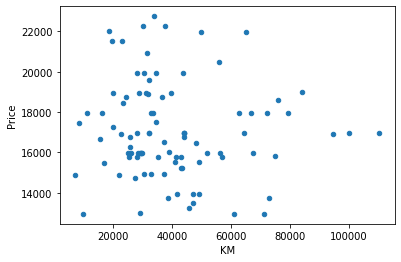

In [ ]:
# Part2 Data Exploration

# Generate a scatterplot based on KM and Price

# A good programing practice: 
# We use a set of placeholder variables with pre-determined variable names (e.g., x_var, y_var) to carry problem-specific (or dataset-specific) parameter values (e.g., KM and Price). 
# Then we use those placeholder variables as the argument values for a method or an operation. 
# By doing this, later, we just need to change the values of those placeholder variables when we have a different problem (or dataset). 

# Placeholder variables: x_var, y_var. 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = 'KM'
y_var = 'Price'

# Draw the scatterplot
df.plot.scatter(x=x_var, y=y_var, legend=False)

                  Price       Age        KM  ...     Doors  Quarterly_Tax    Weight
Price          1.000000 -0.106704 -0.068429  ...  0.051753       0.180809  0.579760
Age           -0.106704  1.000000 -0.077147  ...  0.223002      -0.276595 -0.154935
KM            -0.068429 -0.077147  1.000000  ...  0.023027       0.592243  0.396187
HP             0.637656  0.241590 -0.183834  ... -0.109083      -0.228946  0.248563
CC             0.135741 -0.029227 -0.032651  ...  0.094328       0.100368  0.192225
Doors          0.051753  0.223002  0.023027  ...  1.000000      -0.067540 -0.047267
Quarterly_Tax  0.180809 -0.276595  0.592243  ... -0.067540       1.000000  0.813306
Weight         0.579760 -0.154935  0.396187  ... -0.047267       0.813306  1.000000

[8 rows x 8 columns]


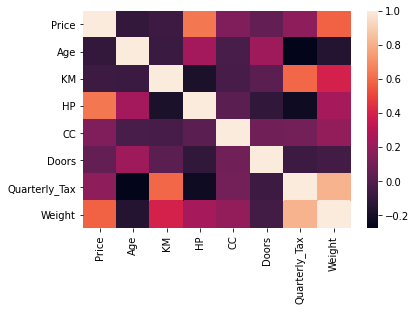

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
df4heatmaps = df


# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0, 0.5, 'Price')

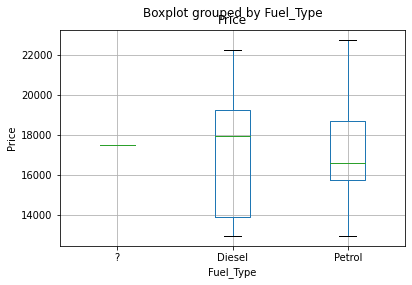

In [ ]:
# Draw a side-by-side box plot to detect if a categorical variable is correlated with a numerical variable


# Placeholder variables: x_var, y_var, df4ssb 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = 'Fuel_Type'
y_var = 'Price'
df4ssb = df

# Generate the side-by-side box plot. ax is the side-by-side boxplot object
ax = df4ssb.boxplot(column=y_var, by=x_var)
# Set the label on the y-axis using set_ylabel method of the object ax
ax.set_ylabel(y_var)

In [4]:
# Part 3 Missing Value Imputation

# Show the number of missing values for each variable in the data frame
df.isnull().sum()

# What if we drop all the observations that contains missing values
print(df.dropna())


# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'Price'
df_sample1 = df.dropna(subset=[DV])

# print(df_sample1)

# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical 
cvar_list = ['Fuel_Type', 'Metallic', 'Automatic', 'Doors']
nvar_list = ['Price', 'Age', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight']

# Impute numerical missing values using sample median
df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = df_sample1[nvar_list].fillna(value=df_sample1[nvar_list].median())


# Get the unique values of the categorical variable Fuel_Type
df_sample2['Fuel_Type'].unique()

# Get the unique values of each categorical variables in the data frame
def column_unique_values(x_column):
  return list(x_column.unique())

df_sample2[cvar_list].apply(column_unique_values)

# Replace the irregular values with the null values which represent missing values in Python
# Placeholder variable: irregular_var, irregular_value 
irregular_var = 'Fuel_Type'
irregular_value = '?'

# pd.np.nan refers to null values in Python
df_sample3 = df_sample2.copy()
df_sample3[irregular_var] = df_sample2[irregular_var].replace(irregular_value, pd.np.nan)

# Impute the categorical missing values using sample mode
df_sample4 = df_sample3.copy()
df_sample4[cvar_list] = df_sample3[cvar_list].fillna(value=df_sample3[cvar_list].mode().loc[0,:])

# Check if there is any missing value left
df_sample4.isnull().sum()


      Price   Age       KM Fuel_Type  ...      CC Doors Quarterly_Tax  Weight
0   13500.0  23.0  46986.0    Diesel  ...  2000.0   3.0         210.0  1165.0
1   13750.0  23.0  72937.0    Diesel  ...  2000.0   3.0         210.0  1165.0
2   13950.0  24.0  41711.0    Diesel  ...  2000.0   3.0         210.0  1165.0
4   13750.0  30.0  38500.0    Diesel  ...  2000.0   3.0         210.0  1170.0
5   12950.0  32.0  61000.0    Diesel  ...  2000.0   3.0         210.0  1170.0
..      ...   ...      ...       ...  ...     ...   ...           ...     ...
95  19950.0  17.0  30351.0    Diesel  ...  1995.0   3.0         234.0  1260.0
96  15950.0  19.0  29435.0    Petrol  ...  1400.0   3.0          85.0  1100.0
97  15950.0  19.0  25948.0    Petrol  ...  1400.0   3.0          85.0  1100.0
98  18750.0  11.0  24500.0    Petrol  ...  1600.0   3.0          85.0  1120.0
99  16950.0  29.0  43905.0    Petrol  ...  1600.0   3.0         100.0  1170.0

[79 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


Price            0
Age              0
KM               0
Fuel_Type        0
HP               0
Metallic         0
Automatic        0
CC               0
Doors            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
# Part 4 Variable transformation

# Standardize the numerical variables 
df_sample5 = df_sample4.copy()
df_sample5[nvar_list] = (df_sample4[nvar_list] - df_sample4[nvar_list].mean())/df_sample4[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample6 = df_sample5.copy()
df_sample6[cvar_list] = df_sample5[cvar_list].astype('category')
df_sample6[nvar_list] = df_sample5[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
# For example, if we choose underscore _, the dummy variable name will be Fuel_Type_Diesel
# If we choose dash -, it will be Fuel_Type-Diesel
df_sample7 = df_sample6.copy()
df_sample7 = pd.get_dummies(df_sample6, prefix_sep='_')

# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['Fuel_Type_Petrol', 'Metallic_No', 'Automatic_N', 'Doors_5.0']
df_sample8 = df_sample7.copy()
df_sample8 = df_sample7.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample8.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample8)
print(df)

['Price' 'Age' 'KM' 'HP' 'CC' 'Quarterly_Tax' 'Weight' 'Fuel_Type_Diesel'
 'Metallic_Yes' 'Automatic_Y' 'Doors_3.0']
       Price       Age        KM  ...  Metallic_Yes  Automatic_Y  Doors_3.0
0  -1.512692 -0.689998  0.341034  ...             1            0          1
1  -1.408163 -0.689998  1.644866  ...             1            0          1
2  -1.324540 -0.443025  0.076007  ...             1            0          1
3  -0.906424  0.297896 -0.284027  ...             1            0          1
4  -1.408163  1.038816 -0.085320  ...             0            0          1
..       ...       ...       ...  ...           ...          ...        ...
95  1.184157 -2.171839 -0.494742  ...             1            0          1
96 -0.488308 -1.677892 -0.540764  ...             1            0          1
97 -0.488308 -1.677892 -0.715958  ...             1            0          1
98  0.682417 -3.653680 -0.788709  ...             1            0          1
99 -0.070192  0.791843  0.186239  ...          